# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
import keras
import tensorflow as tf

from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS
from string import punctuation

from keras.preprocessing import text
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.utils import pad_sequences

import warnings
warnings.filterwarnings("ignore")

# Prepare the data

In [2]:
df1 = pd.read_csv('../dataset/Stress.csv')
df1['text'] = df1['subreddit'] + ' ' + df1['text']
df1 = df1[['text', 'label']]
df1.head()

,text,label
0,"ptsd He said he had not felt that way before, ...",1
1,"assistance Hey there r/assistance, Not sure if...",0
2,ptsd My mom then hit me with the newspaper and...,1
3,"relationships until i met my new boyfriend, he...",1
4,survivorsofabuse October is Domestic Violence ...,1


In [3]:
df2 = pd.read_csv('../dataset/Mental-Health-Twitter.csv')
df2.rename(columns={'post_text':'text'}, inplace=True)
df2 = df2[['text', 'label']]
df2.head()

,text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [4]:
df3 = pd.read_csv('../dataset/depression_dataset_reddit_cleaned.csv')
df3.rename(columns={'clean_text':'text', 'is_depression':'label'}, inplace=True)
df3.head()

,text,label
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [5]:
df4 = pd.read_csv('../dataset/dataset.csv')
df4.head()

,text,label
0,oh my gosh,1
1,"trouble sleeping, confused mind, restless hear...",1
2,"All wrong, back off dear, forward doubt. Stay ...",1
3,I've shifted my focus to something else but I'...,1
4,"I'm restless and restless, it's been a month n...",1


In [6]:
# Merge all datasets
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,text,label
0,"ptsd He said he had not felt that way before, ...",1
1,"assistance Hey there r/assistance, Not sure if...",0
2,ptsd My mom then hit me with the newspaper and...,1
3,"relationships until i met my new boyfriend, he...",1
4,survivorsofabuse October is Domestic Violence ...,1


In [7]:
df.dropna(inplace=True)

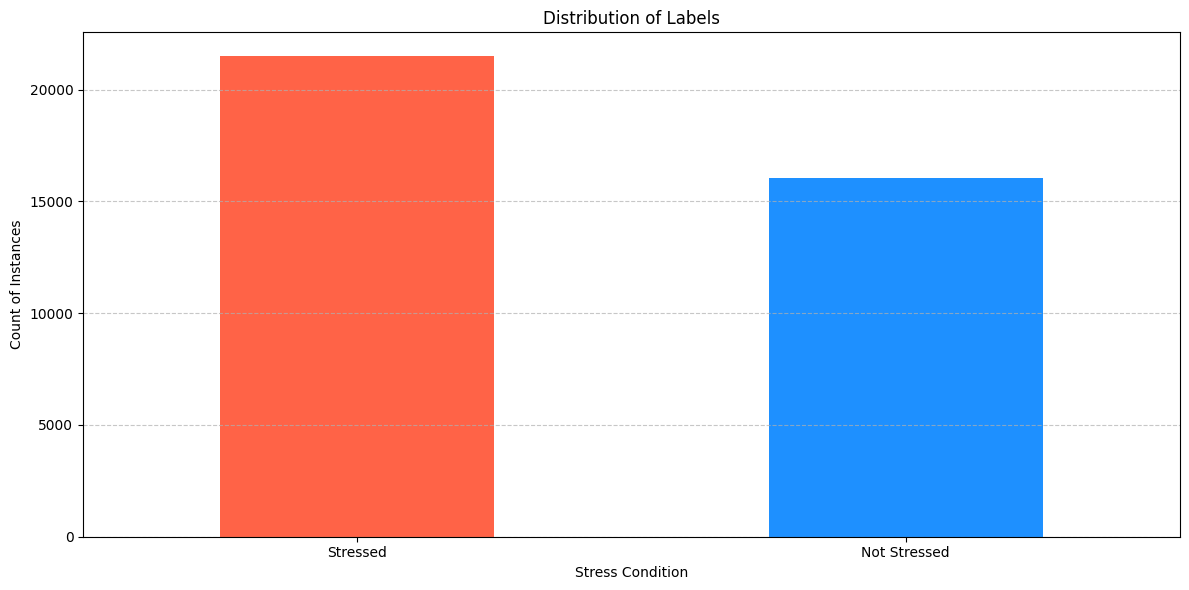

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
colors = ['#FF6347', '#1E90FF']  # Warna untuk kategori Stressed dan Not Stressed
df['label'].value_counts().plot(kind='bar', color=colors)
plt.xticks(ticks=[0, 1], labels=['Stressed', 'Not Stressed'], rotation=0)
plt.xlabel('Stress Condition')
plt.ylabel('Count of Instances')
plt.title('Distribution of Labels')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Tambahkan grid untuk memperjelas visualisasi
plt.tight_layout()  # Memastikan semua elemen terlihat dengan jelas
plt.show()

## Stopwords

In [49]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))|rt|wa|co|bit|ly', '', text)
    return text

def wnl_lemmatize(text):
    wnl = WordNetLemmatizer()
    text = [wnl.lemmatize(word) for word in text.split()]
    return " ".join(text)

df['text'] = df['text'].apply(preprocess_text)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(wnl_lemmatize)

In [12]:
# stopwords = stopwords.words('english')
# wnl = WordNetLemmatizer()

In [13]:
# def preprocess(text):
#     # preprocess html tag
#     text = re.sub(r'<.*?>', '', text)
#     # preprocess non-alphabet
#     text = re.sub(r'[^a-zA-Z]', ' ', text)
#     # lowercase
#     text = text.lower()
#     # remove stopwords
#     text = ' '.join([word for word in text.split() if word not in stopwords])
#     # wnlemmatizer
#     text = ' '.join([wnl.lemmatize(word) for word in text.split()])
#     # remove extra space
#     text = re.sub(r'\s+', ' ', text)
#     # remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)
#     # remove some words
#     text = re.sub(r'http|co|www|com|pic|bit|ly|wa|rt|nt', '', text)
    
#     return text

# df['text'] = df['text'].apply(preprocess)
# df.head()

,text,label
0,ptsd said felt y suggeted go rest trigger ahea...,1
1,assistance hey r assistance sure right place p...,0
2,ptsd mom hit newspaper shocked would know like...,1
3,relationship met new boyfriend amazing kind sw...,1
4,survivorsofabuse october domestic violence are...,1


In [50]:
df.head()

,text,label
0,"ptsd said felt before, suggeted go rest ..trig...",1
1,"assistance hey r/assistance, sure right place ...",0
2,"ptsd mom hit newspaper shocked would this, kno...",1
3,"relationship met new boyfriend, amazing, kind,...",1
4,survivorsofabuse october domestic violence are...,1


## Word cloud

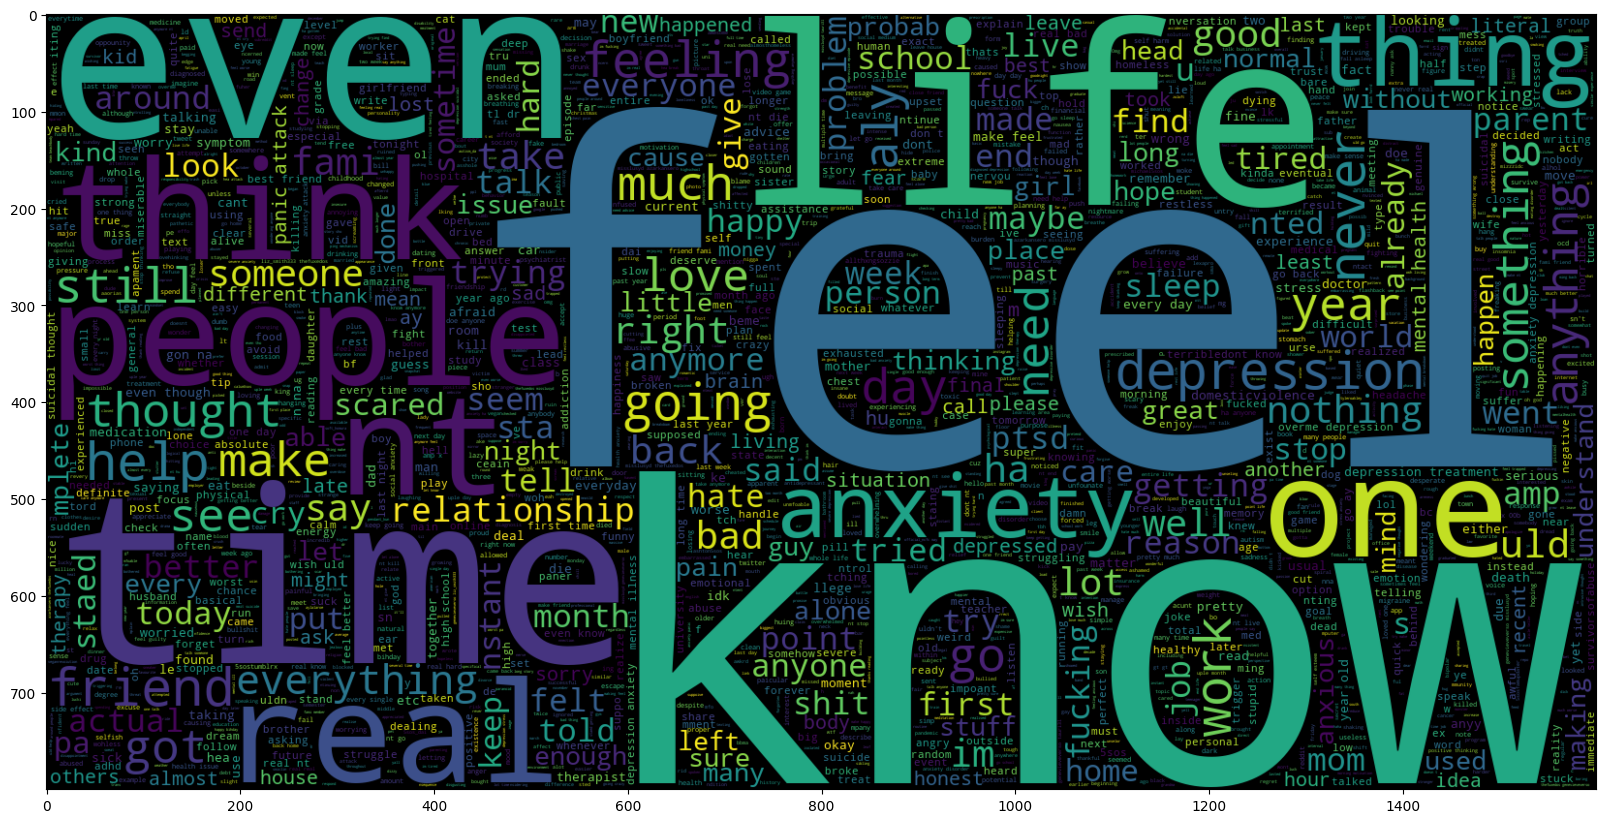

In [51]:
# Kondisi stress
plt.figure(figsize=(20, 20)) 
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc, interpolation='bilinear')

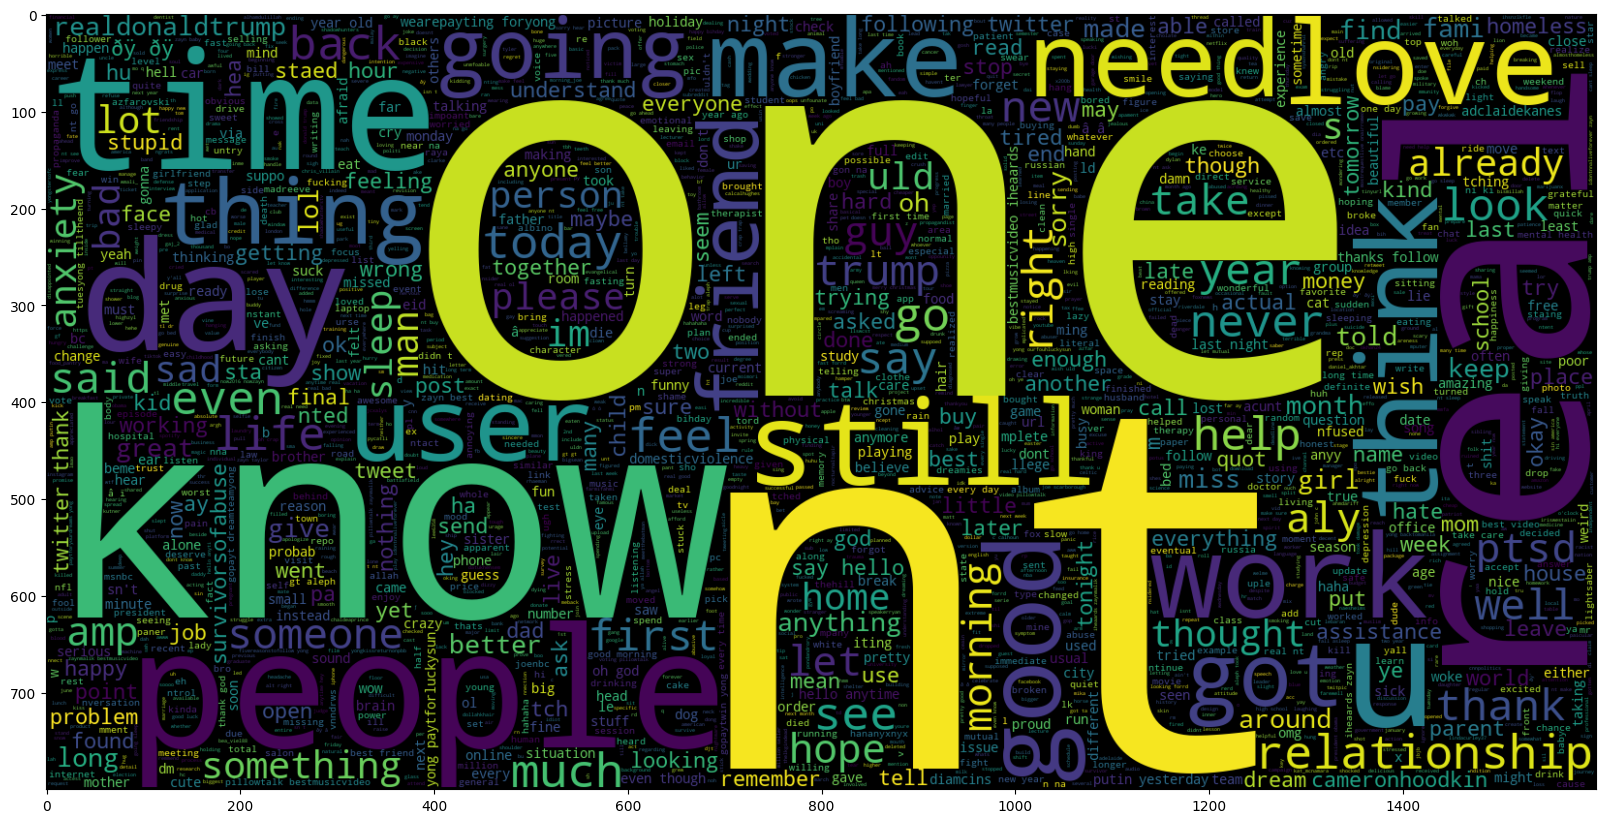

In [52]:
# Kondisi non stress
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc, interpolation='bilinear')

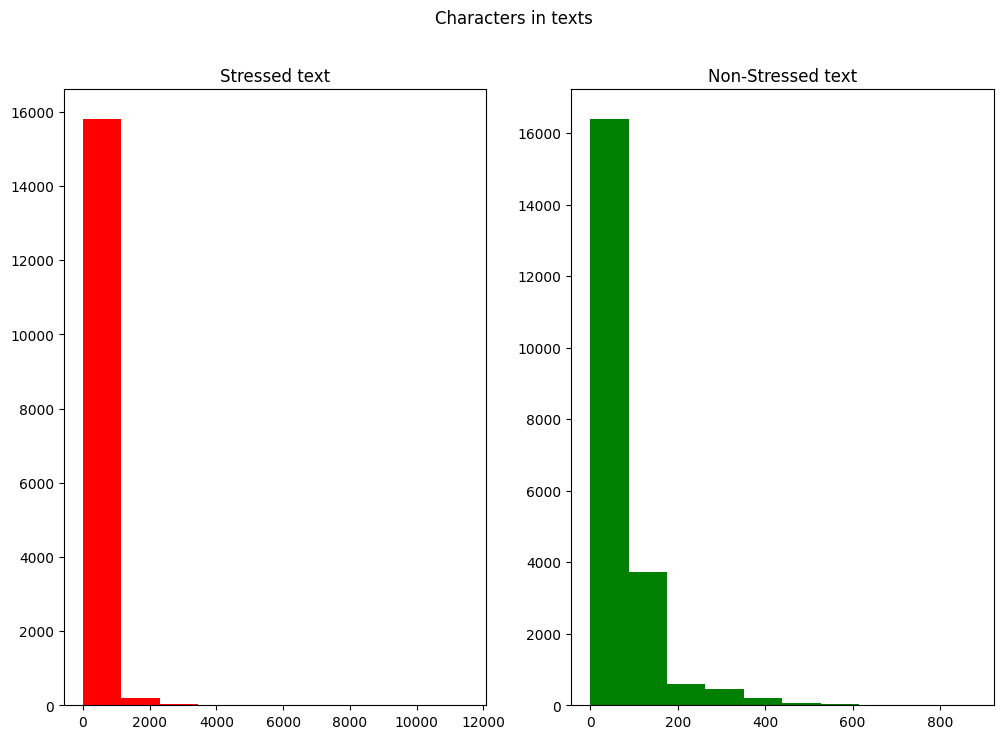

In [34]:
# Jumlah karakter pada text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

text_len=df[df['label'] == 1]['text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('Stressed text')

text_len=df[df['label'] == 0]['text'].str.len()
ax2.hist(text_len, color='green')
ax2.set_title('Non-Stressed text')

fig.suptitle('Characters in texts')
plt.show()

## Get corpus

In [53]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(df['text'])
corpus[:5]

['ptsd', 'said', 'felt', 'before,', 'suggeted']

## Get top text

In [54]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

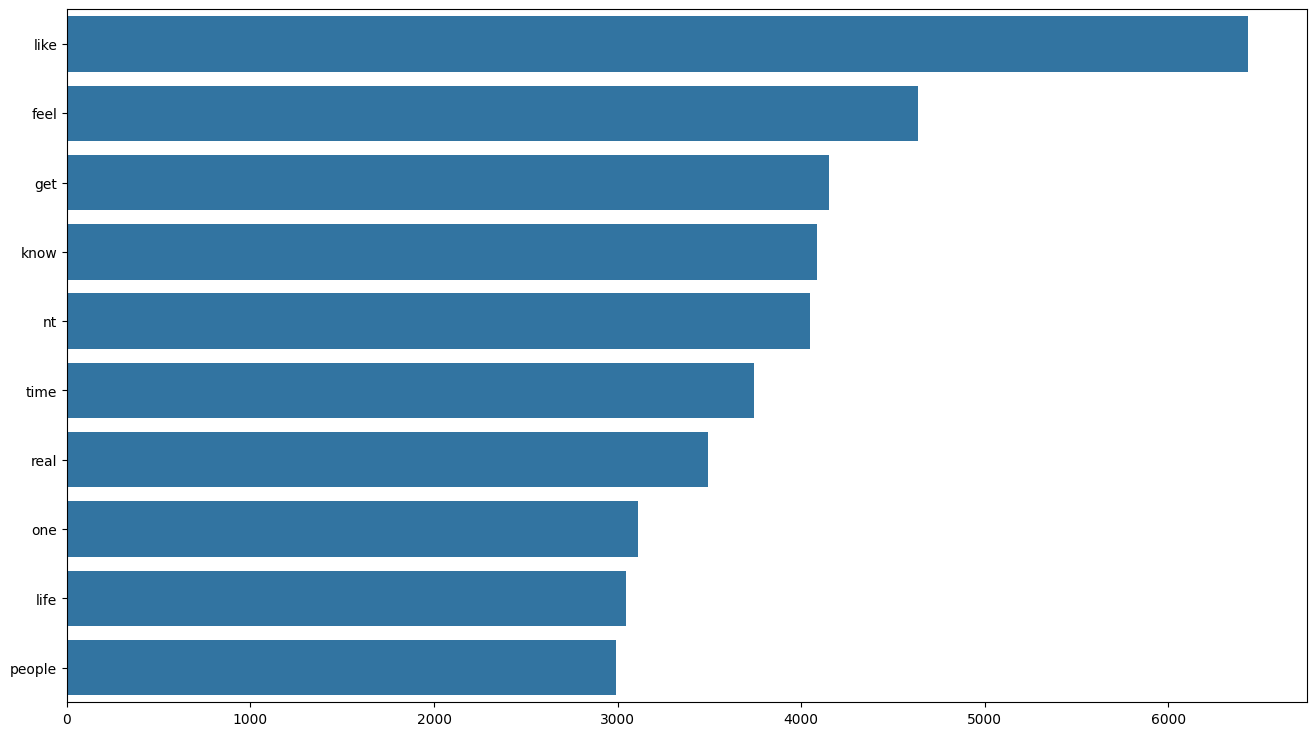

In [55]:
# Analisis unigram
plt.figure(figsize=(16, 9))
most_common_uni = get_top_text_ngrams(df['text'], 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

<Axes: >

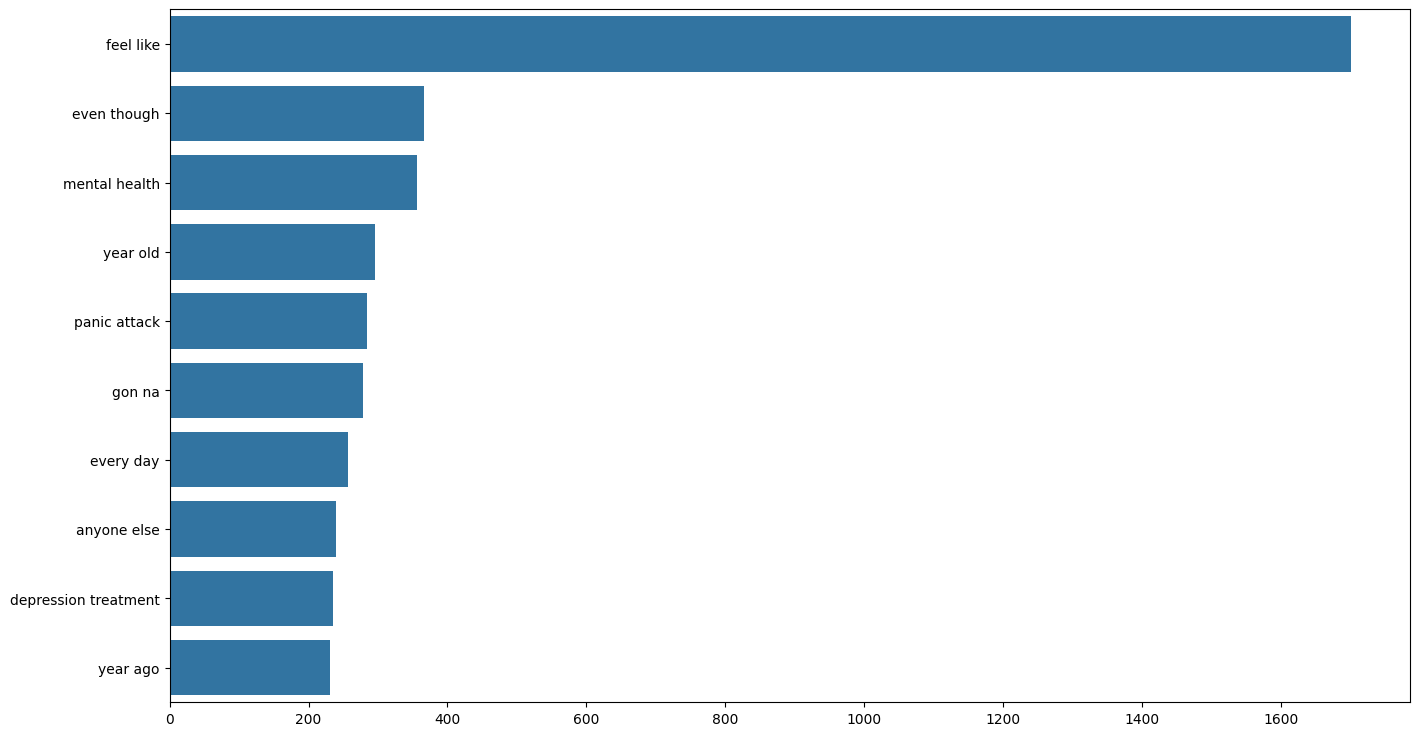

In [56]:
# Analiis bigram
plt.figure(figsize=(16, 9))
most_common_bi = get_top_text_ngrams(df['text'], 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()))

<Axes: >

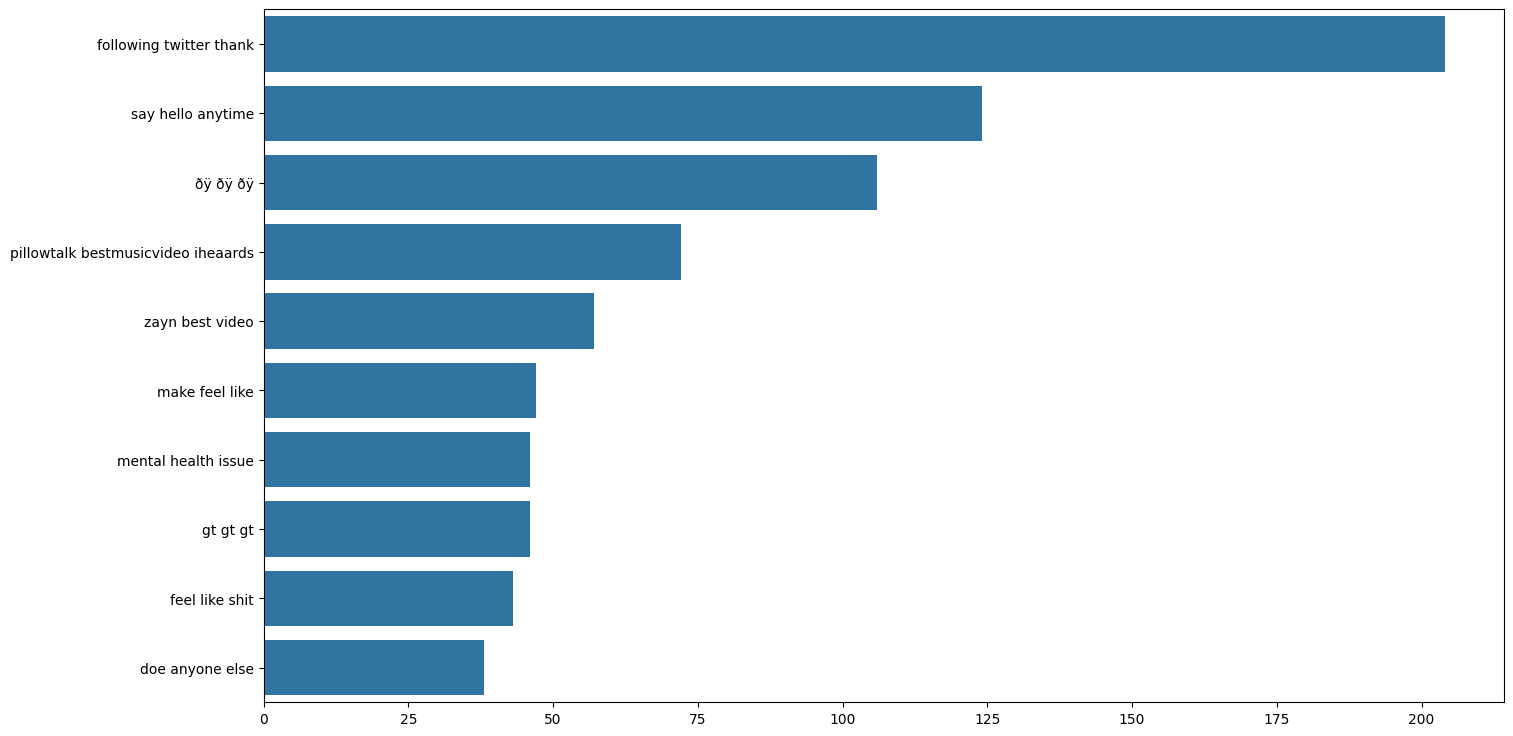

In [57]:
# Analisis trigram
plt.figure(figsize=(16, 9))
most_common_tri = get_top_text_ngrams(df['text'], 10, 3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()), y=list(most_common_tri.keys()))

In [58]:
# to csv
df.to_csv('../dataset/stress_cleaned.csv', index=False)

# Modelling

In [3]:
df = pd.read_csv('../dataset/stress_cleaned.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37517 entries, 0 to 37538
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    37517 non-null  object
 1   label   37517 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 879.3+ KB


In [4]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Tokenizing

In [5]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

tokenizer_json = tokenizer.to_json()
with open('../saved model/tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer_json)

tokenized_train = tokenizer.texts_to_sequences(X_train)
tokenized_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(tokenized_train, maxlen=400)
X_test = pad_sequences(tokenized_test, maxlen=400)

In [6]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

## Training model

In [7]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_binary_accuracy', 
    patience=5, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001 
)

early_stopping = EarlyStopping(
    monitor='val_binary_accuracy', 
    patience=3, 
    verbose=1, 
    restore_best_weights=True
)

csv_logger = CSVLogger('../saved model/training.csv')

callback = [learning_rate_reduction, csv_logger, early_stopping]

In [8]:
model = Sequential([
    Embedding(input_dim=20000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['binary_accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [10]:
history = model.fit(
    X_train, 
    y_train,  
    validation_data=(X_test, y_test), 
    epochs=5, 
    callbacks=callback
)

Epoch 1/5
938/938 [==============================] - 953s 1s/step - loss: 0.4085 - binary_accuracy: 0.8136 - val_loss: 0.3255 - val_binary_accuracy: 0.8546 - lr: 0.0010
Epoch 2/5
938/938 [==============================] - 844s 900ms/step - loss: 0.2222 - binary_accuracy: 0.9086 - val_loss: 0.3205 - val_binary_accuracy: 0.8681 - lr: 0.0010
Epoch 3/5
938/938 [==============================] - 798s 851ms/step - loss: 0.1349 - binary_accuracy: 0.9475 - val_loss: 0.4016 - val_binary_accuracy: 0.8623 - lr: 0.0010
Epoch 4/5
938/938 [==============================] - 829s 884ms/step - loss: 0.0874 - binary_accuracy: 0.9649 - val_loss: 0.5280 - val_binary_accuracy: 0.8601 - lr: 0.0010
Epoch 5/5
938/938 [==============================] - 930s 992ms/step - loss: 0.0665 - binary_accuracy: 0.9719 - val_loss: 0.6289 - val_binary_accuracy: 0.8513 - lr: 0.0010
Epoch 5: early stopping


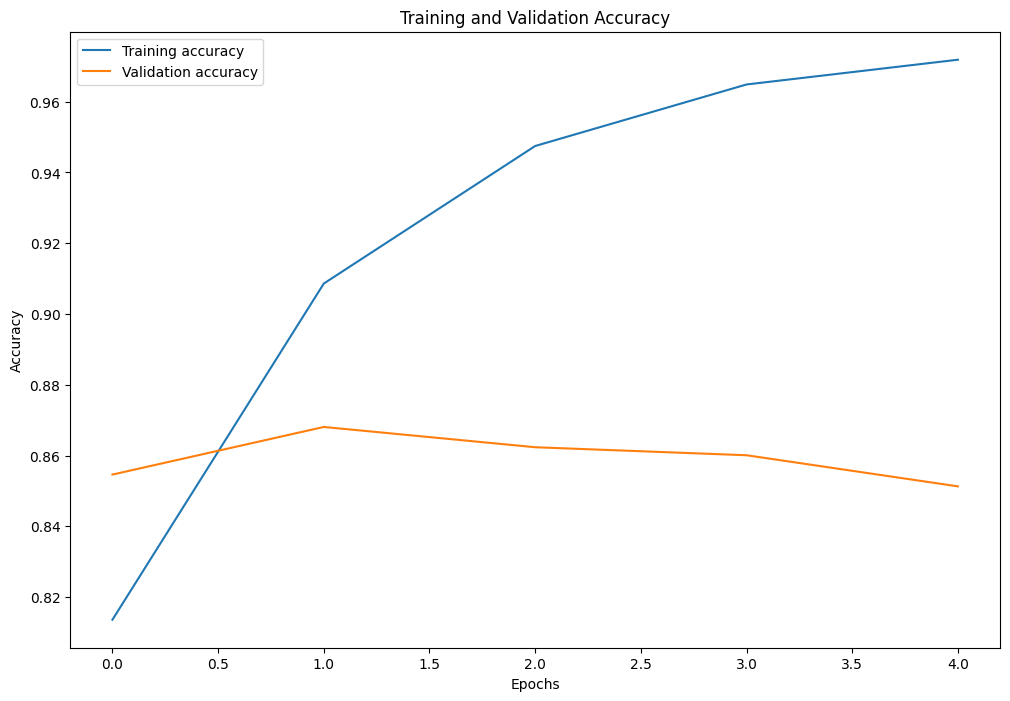

In [11]:
# plot history
plt.figure(figsize=(12, 8))
plt.plot(history.history['binary_accuracy'], label='Training accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32050561904907227
Test accuracy: 0.8680703639984131


In [13]:
# save model
model.save('../saved model/bi_lstm_model.h5')

# Testing

In [7]:
import nltk
import keras
import re
import tensorflow as tf
import string

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from keras_preprocessing.text import tokenizer_from_json
from keras_preprocessing.sequence import pad_sequences

In [8]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)
    
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))|rt|wa|co|bit|ly', '', text)
    return text

def wnl_lemmatize(text):
    wnl = WordNetLemmatizer()
    text = [wnl.lemmatize(word) for word in text.split()]
    return " ".join(text)

def predict_stress(text):
    model = tf.keras.models.load_model('../saved model/bi_lstm_model.h5')
    
    text = preprocess_text(text)
    text = remove_stopwords(text)
    text = wnl_lemmatize(text)
    
    with open('../saved model/tokenizer.json') as f:
        data = f.read()
        tokenizer = tokenizer_from_json(data)
    
    tokenized = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(tokenized, maxlen=400)
    text = tf.convert_to_tensor(padded)
    
    prediction = model.predict(text)
    return prediction[0][0]

pos_text = "I'm very happy today, because I got a satisfactory grade, and my friends supported me a lot."
neg_text = "I'm Feeling depression, sadness, and disappointment is an indescribable experience. Every day feels like a weight that can't quite be lifted, accompanied by a gnawing sense of emptiness inside."
predict_stress(pos_text)

1/1 [==============================] - 2s 2s/step


0.37021518

In [ ]:
# stopwords = set(nltk.corpus.stopwords.words('english'))
# wnl = nltk.stem.WordNetLemmatizer()

# def preprocess(text):
#     # preprocess html tag
#     text = re.sub(r'<.*?>', '', text)
#     # preprocess non-alphabet
#     text = re.sub(r'[^a-zA-Z]', ' ', text)
#     # lowercase
#     text = text.lower()
#     # remove stopwords
#     text = ' '.join([word for word in text.split() if word not in stopwords])
#     # wnlemmatizer
#     text = ' '.join([wnl.lemmatize(word) for word in text.split()])
#     # remove extra space
#     text = re.sub(r'\s+', ' ', text)
#     # remove punctuation
#     text = re.sub(r'[^\w\s]', '', text)
#     # remove some words
#     text = re.sub(r'http|co|www|com|pic|bit|ly|wa|rt|nt', '', text)
    
#     return text

# def testing(text):
#     text = preprocess(text)
#     with open('../saved model/tokenizer.json') as f:
#         data = f.read()
#         tokenizer = tokenizer_from_json(data)
    
#     tokenized = tokenizer.texts_to_sequences([text])
#     tokenized = pad_sequences(tokenized, maxlen=400)
    
#     model = keras.models.load_model('../saved model/bi_lstm_model.h5')
#     prediction = model.predict(tokenized)[0]
    
#     return round(prediction[0], 2)*100

# pos_text = "I'm very happy today, because I got a satisfactory grade, and my friends supported me a lot."
# neg_text = "I'm Feeling depression, sadness, and disappointment is an indescribable experience. Every day feels like a weight that can't quite be lifted, accompanied by a gnawing sense of emptiness inside."

# print("Tingkat stress: ", testing(pos_text), "%")
# print("Tingkat stress: ", testing(neg_text), "%")